In [1]:
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import datetime
import os
import csv

import sys
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator

import sys
#sys.path.append('C:\\Users\\liu_c\\Box Sync')
#from Res_Meas import spectroscopyMeas as st
from Res_Meas import utilities as util

from scipy.optimize import curve_fit
from numpy import power as power

from scipy.constants import hbar
from resonator_tools import circuit

In [2]:
plt.style.use('genstyle')
#parent_dir = 'C:\\Users\\liu_c\\OneDrive - Imperial College London\\ESA Report\\Data\\flux_tuning\\'
parent_dir = os.getcwd()+'/'
util.check_dir(parent_dir)

The directory /Users/lulu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/ESA Report/Data/flux_tuning/ had been created. Transfer to the directory now.


# Import Raw Data

In [4]:
215.8*0.27

58.266000000000005

In [3]:
f = 6.7026e9
powers = np.linspace(-60, 0, 7)
res = "Resonator of {0:4.3f} GHz at {1} dBm".format(f*1e-9,powers[0]) # change power
amps = np.loadtxt(res+'_amps.txt')
phases = np.loadtxt(res+'_phases.txt')
currents = np.loadtxt(res+'_currents.txt')
freqs = np.loadtxt('freqs.txt')

In [4]:
I0 = -6.386474339966723666e-04
P = 5.485e-04
flux = (currents - I0)/P - 1

In [5]:
(-4e-4-I0)/P - 1

-0.5649089626314088

# Import Fit Data

In [2]:
singlecycle_c

NameError: name 'singlecycle_c' is not defined

In [6]:
#util.check_dir(parent_dir + 'fit results\\-60dbm\\')
util.check_dir(parent_dir + 'fit results/-60dbm/')
singlecycle_c = np.loadtxt('singlecycle_c.txt')
singlecycle_f = np.loadtxt('singlecycle_fc_fit.txt')
singlecycle_flux = (singlecycle_c - I0)/P - 1

fcs_slice = np.loadtxt('fcs_slice.txt')
currents_slice = np.loadtxt('currents_slice.txt')
fc_errs_slice = np.loadtxt('fc_errs_slice.txt')
flux_slice = (currents_slice - I0)/P - 1

fq = np.loadtxt('fq_fit.txt')
g = np.loadtxt('g_fit.txt')

The directory /Users/lulu/Library/CloudStorage/OneDrive-ImperialCollegeLondon/ESA Report/Data/flux_tuning/fit results/-60dbm/ had been created. Transfer to the directory now.


In [15]:
(137-78.8)/215.8

0.26969416126042633

In [14]:
0.73*215.8/2

78.767

In [13]:
215.8-0.73*215.8/2

137.03300000000002

In [7]:
def locate_dip(mag, threshold=-33.1):
    i=0
    while mag[i]>threshold:
        i+=1
    return i

def find_stepsize(freqs):
    steps = len(freqs)
    return (freqs[steps-1] - freqs[0])/steps*1e9

def select_cav(freqs, mag, phase, span=50e6, left_tail=20e6, threshold=-33.1):
    i = locate_dip(mag, threshold)
    stepsize = find_stepsize(freqs)
    start_i = i - int(left_tail/stepsize)
    if start_i<0:
        start_i = 0
    end_i = start_i + int(span/stepsize)
    return freqs[start_i:end_i+1], mag[start_i:end_i+1], phase[start_i:end_i+1]

def findItem(X, item, precision=1):
    i = 0
    while np.abs(X[i]-item) > precision:
        i+=1
    return i

def inverse_uncertainty(y, yerr):
    return yerr/(y**2)

def find_outliers(arr, threshold):
    indices = []
    for i in range(len(arr)):
        if arr[i] > threshold:
            indices.append(i)
        if np.isnan(arr[i]):
            indices.append(i)
    return indices

In [31]:
1e5/6.7023e9*100

0.0014920251257031169

In [8]:
indices = find_outliers(fc_errs_slice, 1e5)

fc_errs_slice = np.delete(fc_errs_slice, indices)
fcs_slice = np.delete(fcs_slice, indices)
flux_slice = np.delete(flux_slice, indices)

# Plot Data

In [9]:
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

In [10]:
import matplotlib
matplotlib.colors.Normalize

matplotlib.colors.Normalize

In [11]:
C_g = 4.67e-15
C_all = 7.96e-14 + C_g
epsilon = 11.7
alpha = 7.297e-3
e = 1.6e-19
h = 6.626e-34
g0 = 2*np.sqrt(2)*C_g/C_all*np.sqrt(alpha/epsilon)*np.power(C_all*h/e/e, 1/4)
Ec = e**2/(2*C_all*h)

In [12]:
Ec

229237437.0094028

In [35]:
h/2/e/110e-9/20e-9

0.9411931818181817

In [26]:
fq_max = max(fq)
fq_max**2/8/Ec*1e-9

215.7772570550023

In [101]:
flux_slice[15:150]

array([-1.54941215, -1.54211954, -1.53482692, -1.5275343 , -1.52024169,
       -1.49836384, -1.49107122, -1.48377861, -1.47648599, -1.46919337,
       -1.46190076, -1.45460814, -1.44731553, -1.44002291, -1.43273029,
       -1.42543768, -1.41814506, -1.41085244, -1.40355983, -1.39626721,
       -1.3889746 , -1.38168198, -1.37438936, -1.36709675, -1.35980413,
       -1.35251152, -1.3452189 , -1.33792628, -1.33063367, -1.32334105,
       -1.31604843, -1.30875582, -1.3014632 , -1.29417059, -1.28687797,
       -1.27958535, -1.27229274, -1.26500012, -1.2577075 , -1.25041489,
       -1.24312227, -1.23582966, -1.22853704, -1.22124442, -1.21395181,
       -1.20665919, -1.19936657, -1.19207396, -1.18478134, -1.17748873,
       -1.17019611, -1.16290349, -1.15561088, -1.14831826, -1.14102564,
       -1.13373303, -1.1191478 , -1.11185518, -1.10456256, -1.09726995,
       -1.08997733, -1.08268471, -1.0753921 , -1.06809948, -1.06080687,
       -1.05351425, -1.04622163, -1.03892902, -1.0316364 , -1.02

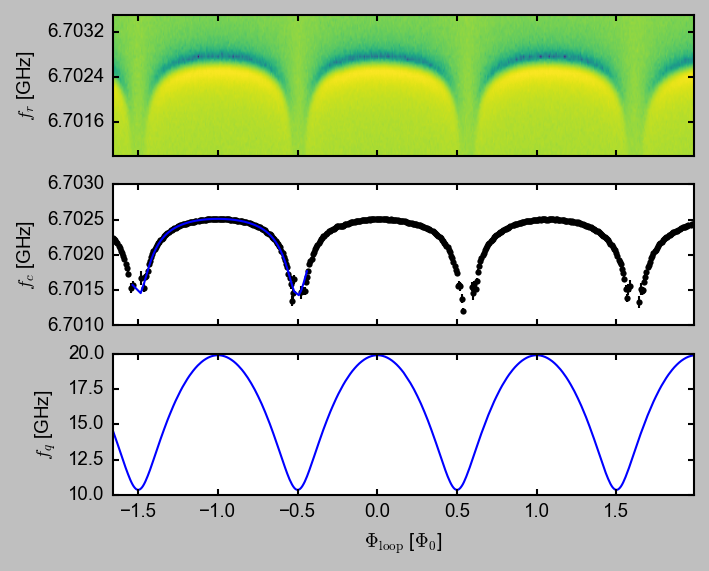

In [11]:
fig, (ax, ax1, ax2) = plt.subplots(3,1, sharex=True, figsize=(5,4))
#im = ax.imshow(amps.T, extent = (min(flux), max(flux), min(freqs), max(freqs)), 
#                     origin='lower', aspect='auto')
#ax.set_ylim(bottom=6.701e9, top=6.7035e9)
#ax.set_xlim(left=-1.55, right=1.6)
im = ax.imshow(amps.T, extent = (min(flux), max(flux), min(freqs)*1e-9, max(freqs)*1e-9), 
                     origin='lower', aspect='auto', cmap='viridis')
ax.set_xlim(xmin=min(flux))
ax.set_ylim(bottom=6.701, top=6.7035)
#ax.set_xlim(left=-1.55, right=1.6)
ax.set_ylabel(r'$f_r$ [GHz]')
#ax.xaxis.set_ticklabels([])
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
#ax.set_xlabel(r'Applied flux [$\Phi_0$]')

#ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax1.set_ylabel(r'$f_c$ [GHz]')
ax2.set_ylabel(r'$f_q$ [GHz]')
ax2.set_xlabel(r'$\Phi_\mathrm{{loop}}$ [$\Phi_0$]')
ax1.plot(singlecycle_flux, singlecycle_f*1e-9, 'b', label='SIS model', zorder=2)
ax1.errorbar(flux_slice, fcs_slice*1e-9, yerr=fc_errs_slice*1e-9, fmt='ko' ,label='fitted cavity', capsize=None, zorder=1)

ax2.plot(flux, fq*1e-9)
fig.set_tight_layout(False)
fig.subplots_adjust(hspace=0.2)

#plt.show()
fig.savefig(parent_dir+'APS_v5.pdf',bbox_inches = 'tight')

(-1.5, -0.5)

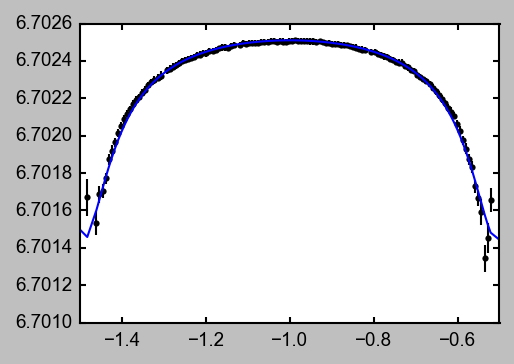

In [11]:
fig, ax = plt.subplots()
ax.plot(singlecycle_flux, singlecycle_f*1e-9, 'b', label='SIS model', zorder=2)
ax.errorbar(flux_slice, fcs_slice*1e-9, yerr=fc_errs_slice*1e-9, fmt='ko' ,label='fitted cavity', capsize=None, zorder=1)
#ax.set_ylim(ymin=6.7024, ymax=6.7026)
ax.set_xlim(xmin=-1.5, xmax=-0.5)

In [127]:
np.std(((fcs_slice[15:150] - singlecycle_f))**2)

24572600395.210102

In [128]:
np.std(np.abs(fcs_slice[15:150] - singlecycle_f))

60601.99025285772

In [16]:
def kick_outliers(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    indices = []
    for i in range(len(arr)):
        if np.abs(arr[i] - mean) > 3*std:
            indices.append(i)
    return indices 

def find_outliers(y, y_err, threshold=0.1):
    indices = []
    for i in range(len(y)):
        if y_err[i] > np.abs(threshold*y[i]) or np.isnan(y_err[i]) or y_err[i]<0:
            indices.append(i)
    return indices

def deviation(x, x_sim):
    return np.sum(np.abs(x_sim-x)/x*100)/len(x)

In [13]:
fc_errs_slice[15:150]

array([50078.78657733, 97466.04904601, 64486.50332515, 43944.29634107,
       36453.28549445, 31197.94654401, 29492.42079613, 31886.08824979,
       23492.87594413, 22258.43747798, 20496.76974633, 23510.23227895,
       20298.16036881, 20745.39222227, 20518.3362068 , 21358.91528521,
       17264.2694237 , 17442.91184139, 21752.51284009, 19224.02744327,
       16822.03394796, 21697.99995163, 19999.86307634, 22407.18887778,
       17596.35608635, 19087.85223573, 18394.89336574, 17536.90568767,
       18866.21874096, 16277.35557928, 16084.38692597, 14890.16083643,
       16656.68749968, 15365.46789623, 17920.67454417, 17328.31587678,
       15903.33752453, 16923.67225524, 13845.70396701, 14595.05041176,
       16134.05839597, 14965.37171578, 16655.3375876 , 17358.89868991,
       14081.50750261, 16310.87721872, 15185.30198127, 15875.15571013,
       16578.50549143, 16532.09488879, 16273.51701876, 14080.35717049,
       14445.27575247, 14998.30675447, 15454.74647043, 15129.63615795,
      

In [38]:
(fcs_slice[15:150] - singlecycle_f)

array([ 4.94786290e+03,  2.11393053e+05, -6.79178133e+04,  2.56765258e+04,
       -1.30086893e+04, -3.48607907e+03,  4.52709781e+04,  3.63211287e+04,
        3.54991223e+04,  4.16134453e+04,  4.09706122e+04,  3.75091142e+04,
        3.31796406e+04,  2.44528991e+04,  2.33928580e+04,  1.71345808e+04,
        1.08532344e+04,  1.18567750e+04,  6.40621449e+03,  1.11553699e+04,
        1.05062011e+04,  4.32882426e+03,  3.59581691e+03,  4.82102553e+02,
        3.89461473e+03,  1.97485559e+02,  3.47766562e+02, -1.45665622e+03,
       -1.00947858e+03,  1.72868739e+03,  1.69662963e+03, -1.37396316e+03,
       -3.08261501e+03, -4.25315439e+03, -1.78597043e+03, -5.62754813e+03,
       -8.54240015e+02, -9.56274498e+03, -1.68124392e+03, -6.94176937e+03,
       -4.42353675e+03, -1.11365098e+03,  9.42941990e+01, -3.42134028e+03,
       -8.13748007e+03, -3.33489803e+03, -1.85441899e+03, -4.40350785e+03,
        1.21458031e+03, -3.19518956e+03, -2.73773444e+03, -2.65911728e+03,
       -4.61027747e+03, -

In [32]:
indices = find_outliers(fcs_slice[15:150], fc_errs_slice[15:150], 0.0001)

In [33]:
indices

[]

In [24]:
np.delete(fcs_slice[15:150], indices)

array([6.70157880e+09, 6.70153418e+09, 6.70168561e+09, 6.70170517e+09,
       6.70177158e+09, 6.70187471e+09, 6.70191694e+09, 6.70196380e+09,
       6.70201402e+09, 6.70205399e+09, 6.70208783e+09, 6.70211773e+09,
       6.70214039e+09, 6.70216812e+09, 6.70218831e+09, 6.70220634e+09,
       6.70222973e+09, 6.70224492e+09, 6.70226873e+09, 6.70228572e+09,
       6.70229588e+09, 6.70231032e+09, 6.70232130e+09, 6.70235007e+09,
       6.70235779e+09, 6.70236861e+09, 6.70237678e+09, 6.70238657e+09,
       6.70239807e+09, 6.70240626e+09, 6.70241090e+09, 6.70241643e+09,
       6.70242207e+09, 6.70243094e+09, 6.70243312e+09, 6.70244355e+09,
       6.70244017e+09, 6.70245306e+09, 6.70245251e+09, 6.70245945e+09,
       6.70246692e+09, 6.70247203e+09, 6.70247218e+09, 6.70247090e+09,
       6.70247891e+09, 6.70248339e+09, 6.70248625e+09, 6.70249428e+09,
       6.70249211e+09, 6.70249463e+09, 6.70249660e+09, 6.70249637e+09,
       6.70249832e+09, 6.70250166e+09, 6.70250160e+09, 6.70250325e+09,
      

In [60]:
(fcs_slice[15:150] - singlecycle_f)/fcs_slice[15:150]

array([ 7.38313022e-07,  3.15433418e-05, -1.01346664e-05,  3.83135338e-06,
       -1.94110140e-06, -5.20172768e-07,  6.75497231e-06,  5.41951340e-06,
        5.29682394e-06,  6.20909554e-06,  6.11314266e-06,  5.59663125e-06,
        4.95062038e-06,  3.64852087e-06,  3.49034187e-06,  2.55656511e-06,
        1.61935246e-06,  1.76907917e-06,  9.55831153e-07,  1.66441698e-06,
        1.56755494e-06,  6.45871853e-07,  5.36504092e-07,  7.19306837e-08,
        5.81081962e-07,  2.94650875e-08,  5.18871138e-08, -2.17334279e-07,
       -1.50614795e-07,  2.57920728e-07,  2.53137391e-07, -2.04995363e-07,
       -4.59925915e-07, -6.34569764e-07, -2.66466070e-07, -8.39627645e-07,
       -1.27452027e-07, -1.42675574e-06, -2.50840089e-07, -1.03570586e-06,
       -6.59987096e-07, -1.66155386e-07,  1.40685703e-08, -5.10459453e-07,
       -1.21410152e-06, -4.97561884e-07, -2.76676402e-07, -6.56996179e-07,
        1.81213181e-07, -4.76716647e-07, -4.08464996e-07, -3.96735341e-07,
       -6.87844829e-07, -

In [34]:
f_exp = np.delete(fcs_slice[15:150], indices)
f_sim = np.delete(singlecycle_f, indices)
print(deviation(f_exp, f_sim))

0.00022627254696206897


In [36]:
indices = kick_outliers(fcs_slice[15:150] - singlecycle_f)

In [144]:
print(deviation(fcs, f_c_ana(flux_n, *popt2)))

11622.502832138893


# Simulation

In [29]:
from numpy.fft import rfft, ifft, fft, irfft
from qutip import *
from scipy.optimize import curve_fit
from numpy import sin as sin
from numpy import cos as cos
from numpy import exp as exp
from numpy import argmin as argmin
from numpy import argmax as argmax
from numpy import power as power
from numpy import sqrt as sqrt
pi = np.pi

def fourier_expansion(x, data, norm='forward', mode='zeroed', plot=True, res=1e-2):
    if mode=='zeroed':
        mean = np.mean(data)
    else:
        mean = 0
    X = fft(data - mean, norm=norm)
    freq = np.fft.fftfreq(len(x), d=(max(x)-min(x))/2/np.pi/len(x))
    
    if plot:
        
        fig, ax = plt.subplots()
        ax.plot(x/np.pi, data, 'b')
        ax.plot(x/np.pi, ifft(X, norm=norm)+mean, 'r*')
        ax.set_xlabel(r'$\phi$/$\pi$')
        ax.set_ylabel('FFT Amplitude |X(freq)|')        

        fig, ax = plt.subplots()
        ax.plot(freq, 2*np.abs(X), 'b*')
        minimum = 2*min(np.abs(X))
        maximum = 2*max(np.abs(X))
        ran = maximum - minimum
        ax.set_xlabel('Freq (Hz)')
        ax.set_ylabel('FFT Amplitude |X(freq)|')
        ax.set_xlim(xmin=-0.1, xmax=10)
        ax.set_ylim(ymin=minimum-0.1*ran, ymax=maximum+0.1*ran)
    
    #X = np.abs(X)
    X[abs(X)<res] = 0
    
    return freq, X

def find_Ej(freq, X, size=5):
    Ej = 0
    if size > len(X)//2+1:
        size = len(X)//2+1
    for i in range(size):
        Ej += 2*freq[i]**2*np.abs(X[i])
    return Ej

def basis_func(f, x, arr):
    #print(int(f))
    return (x+0j)*np.exp(1j*f*arr)



def Ej_basis(i, N=10):
    if i==0:
        return 0.5*np.ones((2*N+1, 2*N+1))
    return np.diag(-np.ones(2*N+1-np.abs(i)), i) #+  np.diag(-np.ones(2*N+1-i), -i))

def SNS(phi, tau_list, sc_gap=1):
    Ejs = []
    for p in phi:
        Ej = np.sum(np.dot(sc_gap, np.sqrt(1-tau_list*np.sin(p/2)**2)))
        #print(Ej)
        Ejs.append(Ej)
    return np.array(Ejs)

def E_m(phi, Em=1):
    return -Em*np.cos(phi/2)

def SIS(phi, Ej=1):
    return Ej*np.cos(phi)

def SIS_squid(flux_n, d, Ej0=1):
    #return -Ej*np.cos(pi*flux_n)*np.sqrt(1+(d*np.tan(pi*flux_n))**2)
    return Ej0*np.sqrt(np.cos(pi*flux_n)**2 + d**2*np.sin(pi*flux_n)**2)

def SIS_squid_flux(flux_n, p, d=0, Ej0=1):
    Ej1 = Ej0/2*(1+d)
    Ej2 = Ej0/2*(1-d)
    return SIS(p, Ej=Ej1) + SIS(p-2*pi*flux_n, Ej=Ej2)

def SNS_squid_flux(flux_n, p, tau_list1, tau_list2, d=0, sc_gap=1):
    sc_gap2 = (1-d)/(1+d)*sc_gap
    return SNS(p, tau_list1, sc_gap=sc_gap) + SNS(p-2*pi*flux_n, tau_list2, sc_gap=sc_gap2)

def find_Ic(Energies, phi):
    I = np.gradient(Energies, phi)
    return h/2/e*max(I)


In [30]:
N=10

def H_c(Ec, ng=0, N=10):
    return Qobj(np.diag(Ec * (np.arange(-N,N+1)-ng)**2))

def H_J(freq, X, N=10, size=9):
    H_j = (0+0j)*np.ones((2*N+1, 2*N+1))
    for i in range(size):
        H_j += X[i]*Ej_basis(i, N=N)
        if i!=0:
            H_j += X[-i]*Ej_basis(-i, N=N)
    return Qobj(H_j)

def H_J_SIS(Ej, N=10):
    return - Qobj(0.5 * Ej * (np.diag(np.ones(2*N-1), 2) + np.diag(np.ones(2*N-1), -2)))

def E_j(Ej0, flux_n, d=0, phase_shift=0):
    phase = flux_n*np.pi + phase_shift
    return Ej0*np.sqrt(np.cos(phase)**2+d**2*np.sin(phase)**2)

def H_J_SIS_SQUID(flux_n, Ej_max, d=0, phase_shift=0, N=10):
    return H_J_SIS(E_j(Ej_max, flux_n, d=d, phase_shift=phase_shift), N=N)


def fq(H):
    energies = H.eigenenergies()
    return np.abs(energies[2]-energies[0])

def f_c_I(flux_n, fc, fqs, Ej0,d):
    return (fc+fqs)/2-sqrt(g(flux_n,fc,Ej0,d)**2+(fqs-fc)**2/4)

def g(flux_n, fc, Ej0, d):
    return g0*fc*np.power(Ej0, 1/4)*np.power(cos(np.pi*flux_n)**2+d**2*sin(np.pi*flux_n)**2, 1/8)

def f_q_ana(flux_n, Ej, d, n_shift=0, N=15):
    fq_ana = []
    for n in flux_n:
        H_J_ana = H_J_SIS_SQUID(n, Ej, d=d, N=N)
        H_ana = H_J_ana + H_c(Ec, N=N)
        fq_ana.append(fq(H_ana))
    return np.array(fq_ana)

def f_c_ana(flux_n, fc, Ej0, d, n_shift=0, N=15):
    return f_c_I(flux_n, fc, f_q_ana(flux_n, Ej0, d, n_shift=n_shift, N=N), Ej0, d)

In [40]:
g0*np.power(Ej0, 1/4)

0.018232417333906882

In [31]:
g(0, 6.70386, Ej0, d)

0.12222757326808499

# How to define Ej

In [23]:


phase = np.linspace(0, 4*pi, 401)
n = 0.5
d=0.8
sc_gap1 = sc_gap/2*(1+d)
fig, ax = plt.subplots()
ax.plot(phase/np.pi, SNS_squid_flux(n, phase, tau_list, tau_list, d=d, sc_gap=sc_gap1))
#plt.plot(phase/np.pi, SIS_squid_flux(n, phase, d=d, Ej1=sc_gap1))


data = SNS_squid_flux(n, phase, tau_list, tau_list, d=d, sc_gap=sc_gap1)
#print('n = {}'.format(n))
freq, X = fourier_expansion(phase, data, mode='none', norm='forward', plot=False, res=1e6)
#print(find_Ej(freq, X))
#print(X)
data = X[0]*np.ones(len(phase))
for i in range(1,len(freq)):
    data += basis_func(freq[i], X[i], phase)
ax.plot(phase/np.pi, data)
#freq, X = fourier_expansion(phase, SNS_squid_flux(n, phase, tau_list, tau_list, d=d, sc_gap=sc_gap), mode='zeroed', norm='forward', plot=False, res=5e8)

NameError: name 'sc_gap' is not defined

2.646529866986856
[ 0.00000000e+00+0.00000000e+00j  7.30462438e+07-1.98914015e+07j
  1.10874866e+10-5.99938504e+09j -4.50609994e+07+3.61825295e+07j
 -1.90091113e+07+2.00514921e+07j -1.10584025e+07+1.43096049e+07j
 -7.41813103e+06+1.12625807e+07j -5.41148805e+06+9.33959343e+06j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.000

/Users/lulu/anaconda3/envs/phd/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


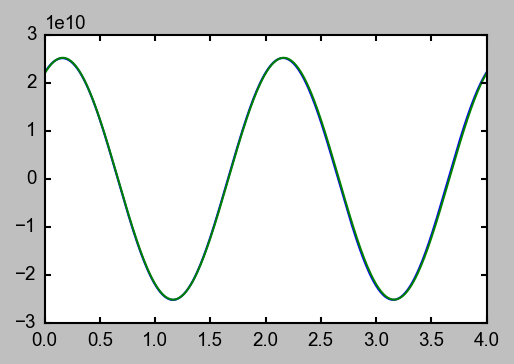

In [471]:
phase = np.linspace(0, 4*pi, 401)

n = 0.45
data = SIS_squid_flux(n, phase, d=d, Ej0=Ej0)
#print('n = {}'.format(n))
freq, X = fourier_expansion(phase, data, mode='zeroed', norm='forward', plot=False, res=1e7)
print(find_Ej(freq, X, size=size)*1e-10)
print(X)

data = (X[0]+0j)*np.ones(len(phase))
for i in range(1,len(freq)):
    data += basis_func(freq[i], X[i], phase)
plt.plot(phase/np.pi, data)
plt.plot(phase/np.pi, SIS_squid_flux(n, phase, d=d, Ej0=Ej0))

In [223]:
find_Ej(freq, X)

10010845691.666782

In [16]:
from numpy import sqrt as sqrt

In [18]:
Ec

229237437.0094028

In [21]:
g0

2.675095171282199e-05

In [17]:
C_g = 4.67e-15
C_all = 7.96e-14 + C_g
epsilon = 11.7
alpha = 7.297e-3
e = 1.6e-19
h = 6.626e-34
g0 = 2*sqrt(2)*C_g/C_all*sqrt(alpha/epsilon)*np.power(C_all*h/e/e, 1/4)
Ec = e**2/(2*C_all*h)
Ej0 = 1.157844091429955750e+11
#d = 0
fc = 6.703673068941554070e+09
d = 0.1
Ej1 = Ej0/2*(1+d)
fc = 6.703673068941554070e+09

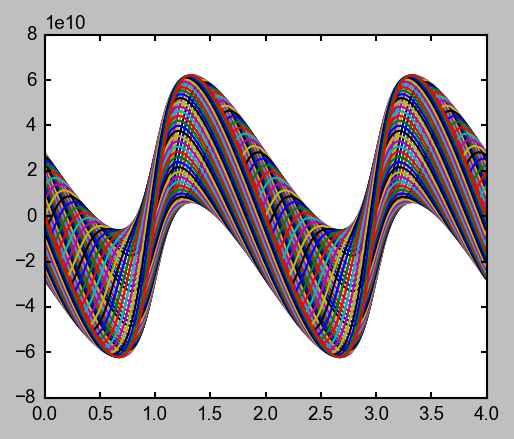

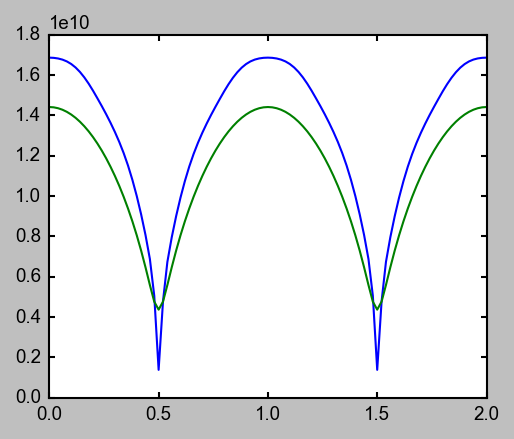

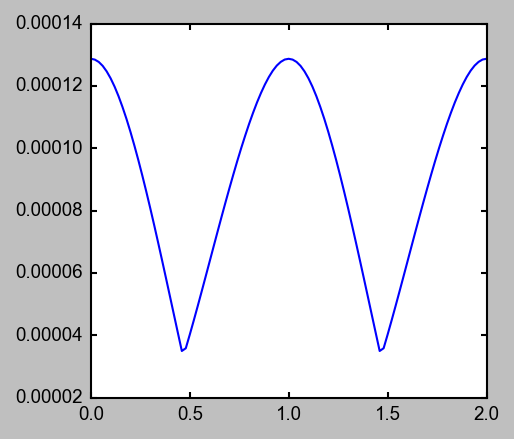

In [57]:
N=15
size = 15

from scipy.constants import k, h, mu_0, e
from scipy.special import ellipk

phi_0 = h/2/e # For superconductor

pi = np.pi

from numpy import sqrt as sqrt


fig, ax = plt.subplots(figsize=(3.5,3))

#axins = ax.inset_axes([0.53,0.25,0.37,0.37])


ng=0

n_bal = 1
tau_list = 0.9*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 101)

C_g = 4.67e-15
C_all = 7.96e-14 + C_g
epsilon = 11.7
alpha = 7.297e-3
e = 1.6e-19
h = 6.626e-34
g0 = 2*sqrt(2)*C_g/C_all*sqrt(alpha/epsilon)*np.power(C_all*h/e/e, 1/4)
Ec = e**2/(2*C_all*h)
Ej0 = 1.157844091429955750e+11
#d = 0
fc = 6.703673068941554070e+09
d = 0.1
Ej1 = Ej0/2*(1+d)
fc = 6.703673068941554070e+09

i = 0

sc_gap = 100e9
Ej_tot_eff = []
Ej_tot_eigen = []
fqs = []
fqs_1 = []
Ics = []



for n in flux_n:
    data_tot = SNS_squid_flux(n, phase, tau_list, tau_list, d=d, sc_gap=sc_gap)# + SIS_squid_flux(n, phase, d=d, Ej0=Ej0)
    #data_tot = SIS_squid_flux(n, phase, d=d, Ej0=Ej0)
    #print('n = {}'.format(n))
    plt.plot(phase/pi, np.gradient(data_tot, phase))
    Ics.append(find_Ic(data_tot, phase))
    freq, X = fourier_expansion(phase, data_tot, mode='zeroed', norm='forward', plot=False, res=1e-2)
    #print(X)
    H_J_tot =  H_J(freq, X, N=N)
    Ej_tot_eff.append(find_Ej(freq, X, size=size))
    Ej_eigens = H_J_tot.eigenenergies()
    Ej_tot_eigen.append(Ej_eigens[1]-Ej_eigens[0])

    
    H_J_SNS =  H_J(freq, X, N=N)
    #H_tot = H_c(Ec, ng=ng, N=N) + H_J_tot
    H_tot = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=d, N=N) + H_J_tot
    H_tot_SIS = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=d, N=N)
    fqs.append(fq(H_tot))
    fqs_1.append(fq(H_tot_SIS))
    
    #print(find_Ej(freq, X, size=size))

#ax.plot(flux_n, Ej_tot_eff)
fig, ax = plt.subplots(figsize=(3.5,3))
plt.plot(flux_n, fqs)
plt.plot(flux_n, fqs_1)

fig, ax = plt.subplots(figsize=(3.5,3))
plt.plot(flux_n, Ics)
#plt.plot(flux_n, fqs)
#ax.plot(flux_n, SIS_squid(flux_n, d, Ej0))
#ax.plot(flux_n, fqs)
#p0 = [Ej0, d]
#bounds = ([max(fqs)**2/8/Ec, 0], [max(fqs)**2/8/Ec+1e10, 1])
#popt2, pcov2 = curve_fit(f_q_ana, flux_n, fqs, p0=p0, bounds=bounds, maxfev=50000)
#ax.plot(flux_n, f_q_ana(flux_n, *p0, N=N), 'r-', label=r'r = {:.2f}'.format(ratios[20]))
#ax.plot(flux_n, Ej_tot_eigen)

In [611]:
p0

[115784409142.99557, 0.27086554679168584]

In [610]:
popt2

array([1.13306516e+11, 2.47682703e-01])

In [588]:
H_tot.eigenenergies()[2]-H_tot.eigenenergies()[0]

14415018619.955673

In [589]:
np.sqrt(8*Ec*max(Ej_tot_eff))

14970044899.828907

In [492]:
H_tot = H_J_SIS_SQUID(flux_n[-1], Ej0, d=d, phase_shift=0, N=N) + H_J_SNS
np.abs(H_tot.eigenenergies())

array([1.02576157e+11, 1.01916963e+11, 9.23411693e+10, 8.97878661e+10,
       7.59443249e+10, 7.05096344e+10, 5.43630863e+10, 4.54608508e+10,
       2.89283748e+10, 1.65026733e+10, 1.27135762e+09, 1.41185511e+10,
       2.67603770e+10, 4.39217233e+10, 5.32188439e+10, 7.03922367e+10,
       7.61985781e+10, 9.12175609e+10, 9.39939411e+10, 1.04527916e+11,
       1.05252730e+11])

In [23]:
Ec

229237437.0094028

In [34]:
Ej0*1e-9

215.7844091429956

In [22]:
C_g = 4.67e-15
C_all = 7.96e-14 + C_g
epsilon = 11.7
alpha = 7.297e-3
e = 1.6e-19
h = 6.626e-34
g0 = 2*sqrt(2)*C_g/C_all*sqrt(alpha/epsilon)*np.power(C_all*h/e/e, 1/4)
Ec = e**2/(2*C_all*h)
Ej0 = 2.157844091429955750e+11
d = 2.708655467916858406e-01
fc = 6.703673068941554070e+09

TypeError: H_J() missing 1 required positional argument: 'X'

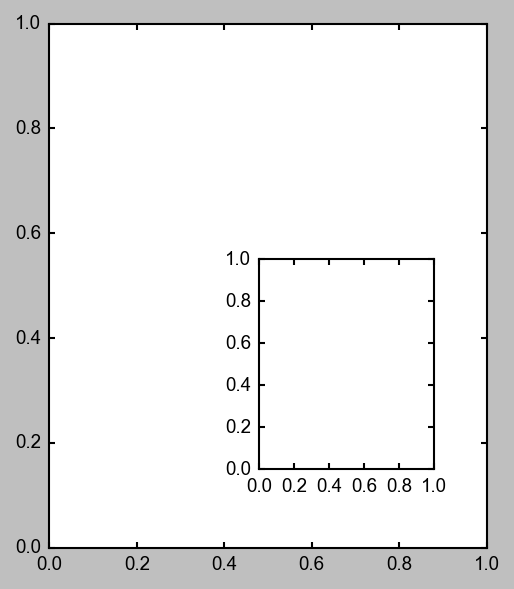

In [43]:
N=15
size = 15

from scipy.constants import k, h, mu_0, e
from scipy.special import ellipk

phi_0 = h/2/e # For superconductor

pi = np.pi

from numpy import sqrt as sqrt


fig, ax = plt.subplots(figsize=(3.5,4))

axins = ax.inset_axes([0.48,0.15,0.4,0.4])


ng=0

n_bal = 1
tau_list = 0.9*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 101)

C_g = 4.67e-15
C_all = 7.96e-14 + C_g
epsilon = 11.7
alpha = 7.297e-3
e = 1.6e-19
h = 6.626e-34
g0 = 2*sqrt(2)*C_g/C_all*sqrt(alpha/epsilon)*np.power(C_all*h/e/e, 1/4)
Ec = e**2/(2*C_all*h)
Ej0 = 2.157844091429955750e+11
d = 2.708655467916858406e-01
fc = 6.703673068941554070e+09

i = 0

deviations = []
sc_gaps = np.linspace(0, 100e9, 31)
ratios = []

for sc_gap in sc_gaps:
    fqs = []
    Ej_SNS_eff = []


    for n in flux_n:
        data = SNS_squid_flux(n, phase, tau_list, tau_list, d=d, sc_gap=sc_gap)
        #print('n = {}'.format(n))
        results = fourier_expansion(phase, data, mode='zeroed', norm='forward', plot=False, res=1e-2)
        freq, X = results
        H_num = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=d, N=N) + H_J(X, size=size, N=N)
        Ej_SNS_eff.append(find_Ej(freq, X, size=size))
        qub_f = fq(H_num)
        fqs.append(qub_f)
    
    fqs = np.array(fqs)
    fcs = f_c_I(flux_n, fc, fqs, Ej0, d)
    
    
    p0 = [max(fqs)**2/8/Ec, 0.3]
    bounds = ([0, 0], [max(fqs)**2/8/Ec, 1])
    popt1, pcov1 = curve_fit(f_q_ana, flux_n, fqs, p0=p0, bounds=bounds, maxfev=50000)
    
    
    p0 = [fc, max(fqs)**2/8/Ec, 0.3]
    bounds = ([fc-1e9, 0, 0], [fc+1e9, max(fqs)**2/8/Ec, 1])
    popt2, pcov2 = curve_fit(f_c_ana, flux_n, fcs, p0=p0, bounds=bounds, maxfev=50000)
    #fig1, ax1 = plt.subplots()
    #ax1.plot(flux_n, fcs*1e-9, 'C{}.'.format(i), zorder=1)
    #ax1.plot(flux_n, f_c_ana(flux_n, *popt2)*1e-9, 'C{}'.format(i))
    if i == 21:
        #axins.plot(flux_n, fqs*1e-9, 'C{}.'.format(i), zorder=1)
        axins.plot(flux_n, fcs*1e-9, 'k.', zorder=1)
        #axins.plot(flux_n, f_q_ana(flux_n, *popt1)*1e-9, 'C{}'.format(i))
        axins.plot(flux_n, f_c_ana(flux_n, *popt2)*1e-9, 'k')
        axins.yaxis.set_major_locator(MaxNLocator(nbins=4))
        #axins.yaxis.set_major_locator(MaxNLocator(nbins=4))
        axins.set_ylabel(r'$f_c$ [GHz]')
        axins.set_xlabel(r'$\Phi_\mathrm{{loop}}$ [$\Phi_0$]')
        #axins.set_ylabel(r'$f_q$ [GHz]')
        axins.set_xlim(xmin=0.5, xmax=1.5)
    
    
    deviations.append(deviation(fcs, f_c_ana(flux_n, *popt2)))
    ratios.append(max(Ej_SNS_eff)/Ej0)

    i+=1


ax.plot(ratios, deviations, 'k*--')
ax.set_xlabel('ratio')
ax.set_ylabel('Deviation [%]')
#ax.axhline(y=6151, c='C0')
ax.set_xlim(xmax=max(ratios))
fig.savefig('flux_tuning_simulation.pdf')

In [66]:
def calc_Ej(tau_list, sc_gap=1):
    return sc_gap/4*np.sum(tau_list)

In [540]:
Ec = e**2/(2*C_all*h)
Ej0 = 2.157844091429955750e+11
np.sqrt(8*Ec*Ej0)*1e-9

19.892886145258792

In [35]:
sc_gaps = np.linspace(0, 200e9, 31)

In [37]:
sc_gaps[13]*1e-9

86.66666666666667

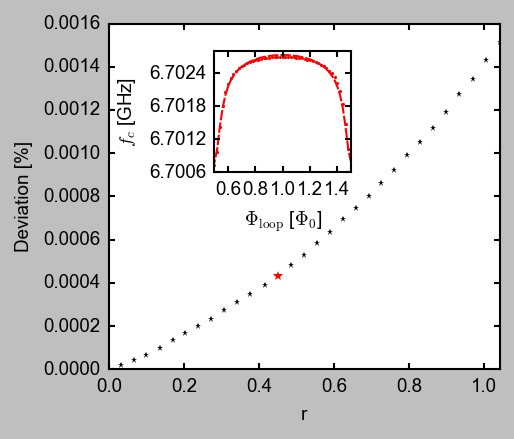

In [48]:
N=15
size = 15

from scipy.constants import k, h, mu_0, e
from scipy.special import ellipk

phi_0 = h/2/e # For superconductor

pi = np.pi

from numpy import sqrt as sqrt


fig, ax = plt.subplots(figsize=(3.5,3))

axins = ax.inset_axes([0.27,0.57,0.35,0.35])


ng=0

n_bal = 1
tau_list = 0.9*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 101)

C_g = 4.67e-15
C_all = 7.96e-14 + C_g
epsilon = 11.7
alpha = 7.297e-3
e = 1.6e-19
h = 6.626e-34
g0 = 2*sqrt(2)*C_g/C_all*sqrt(alpha/epsilon)*np.power(C_all*h/e/e, 1/4)
Ec = e**2/(2*C_all*h)
Ej0 = 2.157844091429955750e+11
d = 2.708655467916858406e-01
fc = 6.703673068941554070e+09

i = 0

deviations = []
sc_gaps = np.linspace(0, 200e9, 31)
ratios = []
ratios_approx = []
Ej_SNS_effs = []
Ej_tot_effs = []
fqs_array = []
fqs_total_array = []
for sc_gap in sc_gaps:
    fqs = []
    fqs_total = []
    Ej_SNS_eff = []
    Ej_total_eff = []


    for n in flux_n:
        data = SNS_squid_flux(n, phase, tau_list, tau_list, d=d, sc_gap=sc_gap)
        #print('n = {}'.format(n))
        res = 1e7
        results = fourier_expansion(phase, data, mode='zeroed', norm='forward', plot=False, res=res)
        freq, X = results
        H_num = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=d, N=N) + H_J(freq, X, size=size, N=N)
        Ej_SNS_eff.append(find_Ej(freq, X, size=size))
        qub_f = fq(H_num)
        fqs.append(qub_f)

        data_total = SNS_squid_flux(n, phase, tau_list, tau_list, d=d, sc_gap=sc_gap) + SIS_squid_flux(n, phase, d=d, Ej0=Ej0)
        freq, X = fourier_expansion(phase, data_total, mode='zeroed', norm='forward', plot=False, res=res)
        Ej_tot_eff.append(find_Ej(freq, X, size=size))
        H_num_v2 = H_c(Ec, ng=ng, N=N) + H_J(freq, X, size=size, N=N)
        qub_f = fq(H_num)
        fqs_total.append(qub_f)    

    fqs = np.array(fqs)
    fqs_total = np.array(fqs_total)
    fcs = f_c_I(flux_n, fc, fqs, Ej0, d)
    
    
    p0 = [max(fqs)**2/8/Ec-1e9, d]
    bounds = ([0, 0], [max(fqs)**2/8/Ec, 1])
    popt1, pcov1 = curve_fit(f_q_ana, flux_n, fqs, p0=p0, bounds=bounds, maxfev=50000)
    
    
    p0 = [fc, max(fqs)**2/8/Ec-1e9, d]
    bounds = ([fc-1e9, 0, 0], [fc+1e9, max(fqs)**2/8/Ec, 1])
    popt2, pcov2 = curve_fit(f_c_ana, flux_n, fcs, p0=p0, bounds=bounds, maxfev=50000)
    #fig1, ax1 = plt.subplots()
    #ax1.plot(flux_n, fcs*1e-9, 'C{}.'.format(i), zorder=1)
    #ax1.plot(flux_n, f_c_ana(flux_n, *popt2)*1e-9, 'C{}'.format(i))
    if i == 13:
        #axins.plot(flux_n, fqs*1e-9, 'C{}.'.format(i), zorder=1)
        axins.plot(flux_n, fcs*1e-9, 'r.', zorder=1)
        #axins.plot(flux_n, f_q_ana(flux_n, *popt1)*1e-9, 'C{}'.format(i))
        axins.plot(flux_n, f_c_ana(flux_n, *popt2)*1e-9, 'r--', dashes=(5, 1))
        axins.yaxis.set_major_locator(MaxNLocator(nbins=4))
        #axins.yaxis.set_major_locator(MaxNLocator(nbins=4))
        axins.set_ylabel(r'$f_c$ [GHz]')
        axins.set_xlabel(r'$\Phi_\mathrm{{loop}}$ [$\Phi_0$]')
        #axins.set_ylabel(r'$f_q$ [GHz]')
        axins.set_xlim(xmin=0.5, xmax=1.5)
        axins.set_ylim(ymax=6.7028)
    
    
    deviations.append(deviation(fcs, f_c_ana(flux_n, *popt2)))
    ratios.append(max(Ej_SNS_eff)/Ej0)
    #ratios_approx.append(calc_Ej(tau_list, sc_gap=sc_gap)/Ej0)
    i+=1
    Ej_SNS_effs.append(Ej_SNS_eff)
    Ej_tot_effs.append(Ej_tot_eff)
    fqs_array.append(fqs)
    fqs_total_array.append(fqs_total)


ax.plot(ratios, deviations, 'k*')
ax.plot(ratios[13], deviations[13], 'r*', ms=5)
ax.set_xlabel('r')
ax.set_ylabel('Deviation [%]')
#ax.axhline(y=6151, c='C0')
ax.set_xlim(xmax=max(ratios))
#ax.set_ylim(ymax=max(deviations))
fig.savefig('flux_tuning_simulation_thesis_style.pdf')

(0.0, 1.041225203809896)

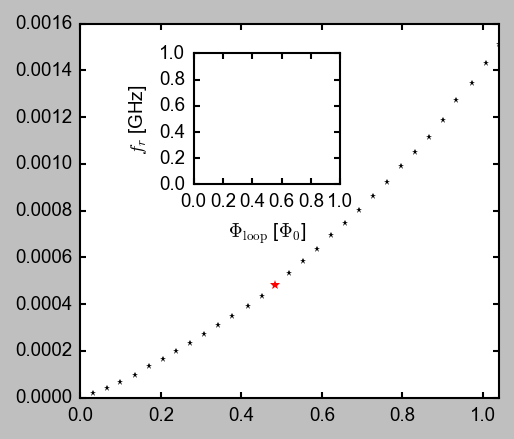

In [638]:
fig, ax = plt.subplots(figsize=(3.5,3))

axins = ax.inset_axes([0.27,0.57,0.35,0.35])
ax.plot(ratios, deviations, 'k*')
ax.plot(ratios[14], deviations[14], 'r*', ms=5)
axins.set_ylabel(r'$f_r$ [GHz]')
axins.set_xlabel(r'$\Phi_\mathrm{{loop}}$ [$\Phi_0$]')
ax.set_xlim(xmax=max(ratios))
#ax.set_ylim(ymax=max(deviations))

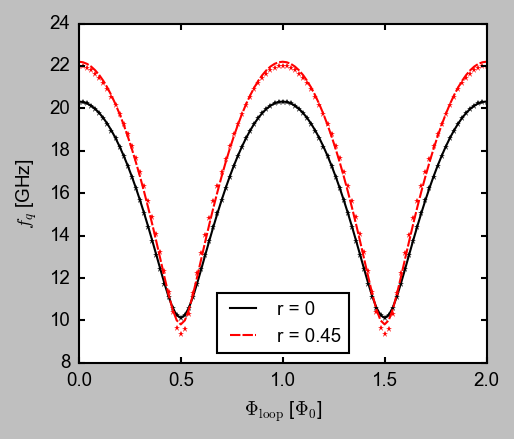

In [33]:
fig, ax = plt.subplots(figsize=(3.5,3))

ax.plot(flux_n, fqs_total_array[0]*1e-9, 'k*')

fqs = fqs_array[0]
p0 = [Ej0, d]
bounds = ([0, 0], [max(fqs)**2/8/Ec, 1])
popt1, pcov1 = curve_fit(f_q_ana, flux_n, fqs, p0=p0, bounds=bounds, maxfev=50000)
ax.plot(flux_n, f_q_ana(flux_n, *popt1, N=N)*1e-9, 'k-', label=r'r = 0')


ax.plot(flux_n, fqs_total_array[13]*1e-9, 'r*')

fqs = fqs_array[13]
p0 = [max(fqs)**2/8/Ec-1e9, d]
bounds = ([0, 0], [max(fqs)**2/8/Ec, 1])
popt2, pcov2 = curve_fit(f_q_ana, flux_n, fqs, p0=p0, bounds=bounds, maxfev=50000)
ax.plot(flux_n, f_q_ana(flux_n, *popt2, N=N)*1e-9, 'r--', label=r'r = {:.2f}'.format(ratios[13]), dashes=(5, 1))

ax.set_ylabel(r'$f_q$ [GHz]')
ax.set_xlabel(r'$\Phi_\mathrm{{loop}}$ [$\Phi_0$]')
ax.legend(loc='lower center')
fig.savefig('flux_tuning_qubit_simul.pdf')

In [ ]:
## Comparison

N=10
size = 10

from scipy.constants import k, h, mu_0, e
from scipy.special import ellipk

phi_0 = h/2/e # For superconductor

pi = np.pi

from numpy import sqrt as sqrt


fig, ax = plt.subplots(figsize=(3.5,3))

axins = ax.inset_axes([0.53,0.25,0.37,0.37])


ng=0

n_bal = 1
tau_list = 0.9*np.ones(n_bal)
phase = np.linspace(0, 4*pi, 401)
flux_n = np.linspace(0, 2, 101)

C_g = 4.67e-15
C_all = 7.96e-14 + C_g
epsilon = 11.7
alpha = 7.297e-3
e = 1.6e-19
h = 6.626e-34
g0 = 2*sqrt(2)*C_g/C_all*sqrt(alpha/epsilon)*np.power(C_all*h/e/e, 1/4)
Ec = e**2/(2*C_all*h)
Ej0 = 2.157844091429955750e+11
d = 2.708655467916858406e-01
fc = 6.703673068941554070e+09

i = 0

deviations = []
sc_gaps = np.linspace(0, 100e9, 31)
ratios = []

for sc_gap in sc_gaps:
    fqs = []
    Ej_SNS_eff = []
    #Ej_eff = []


    for n in flux_n:
        data = SNS_squid_flux(n, phase, tau_list, tau_list, d=d, sc_gap=sc_gap) + 
        #print('n = {}'.format(n))
        results = fourier_expansion(phase, data, mode='zeroed', norm='forward', plot=False, res=1e-2)
        freq, X = results
        H_num = H_c(Ec, ng=ng, N=N) + H_J_SIS_SQUID(n, Ej0, d=d, N=N) + H_J(X, size=size, N=N)
        Ej_SNS_eff.append(find_Ej(freq, X, size=size))
        #Ej_eff.append(find_Ej(freq, fourier_expansion()))
        qub_f = fq(H_num)
        fqs.append(qub_f)
    
    fqs = np.array(fqs)
    fcs = f_c_I(flux_n, fc, fqs, Ej0, d)
    
    
    p0 = [max(fqs)**2/8/Ec/2, 0.3]
    bounds = ([0, 0], [max(fqs)**2/8/Ec, 1])
    popt1, pcov1 = curve_fit(f_q_ana, flux_n, fqs, p0=p0, bounds=bounds, maxfev=50000)
    
    
    p0 = [fc, max(fqs)**2/8/Ec/2, 0.3]
    bounds = ([fc-1e9, 0, 0], [fc+1e9, max(fqs)**2/8/Ec, 1])
    popt2, pcov2 = curve_fit(f_c_ana, flux_n, fcs, p0=p0, bounds=bounds, maxfev=50000)
    #fig1, ax1 = plt.subplots()
    #ax1.plot(flux_n, fcs*1e-9, 'C{}.'.format(i), zorder=1)
    #ax1.plot(flux_n, f_c_ana(flux_n, *popt2)*1e-9, 'C{}'.format(i))
    if i == 21:
        #axins.plot(flux_n, fqs*1e-9, 'C{}.'.format(i), zorder=1)
        axins.plot(flux_n, fcs*1e-9, 'r.', zorder=1)
        #axins.plot(flux_n, f_q_ana(flux_n, *popt1)*1e-9, 'C{}'.format(i))
        axins.plot(flux_n, f_c_ana(flux_n, *popt2)*1e-9, 'r')
        axins.yaxis.set_major_locator(MaxNLocator(nbins=4))
        #axins.yaxis.set_major_locator(MaxNLocator(nbins=4))
        axins.set_ylabel(r'$f_r$ [GHz]')
        axins.set_xlabel(r'$\Phi_\mathrm{{loop}}$ [$\Phi_0$]')
        #axins.set_ylabel(r'$f_q$ [GHz]')
        axins.set_xlim(xmin=0.5, xmax=1.5)
    
    
    deviations.append(deviation(fcs, f_c_ana(flux_n, *popt2)))
    ratios.append(max(Ej_SNS_eff)/Ej0)

    plt.plot(flux_n, Ej_SNS_)
    i+=1


ax.plot(ratios, deviations, 'k*--')
ax.plot(ratios[21], deviations[21], 'r*', ms=5)
ax.set_xlabel('ratio')
ax.set_ylabel('Deviation [%]')
#ax.axhline(y=6151, c='C0')
ax.set_xlim(xmax=max(ratios))
fig.savefig('flux_tuning_simulation_thesis_style.pdf')

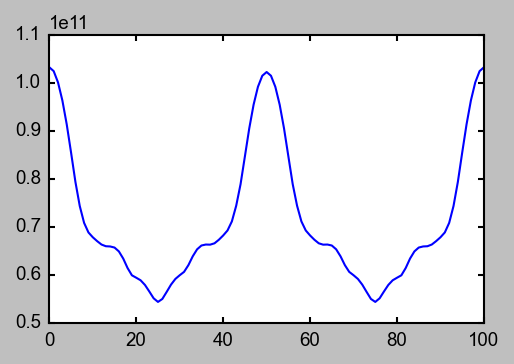

In [65]:
plt.plot(Ej_SNS_eff)

In [ ]:
np.argmin(np.abs(flux_slice))

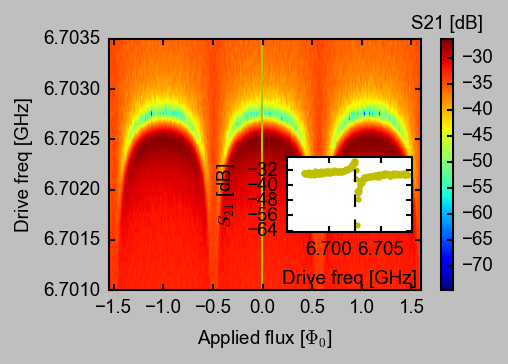

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(amps.T, extent = (min(flux), max(flux), min(freqs)*1e-9, max(freqs)*1e-9), 
                     origin='lower', aspect='auto')
ax.set_ylim(bottom=6.701, top=6.7035)
ax.set_xlim(left=-1.55, right=1.6)
ax.set_ylabel('Drive freq [GHz]')
ax.set_xlabel(r'Applied flux [$\Phi_0$]')
#ax.plot(singlecycle_flux, singlecycle_f, 'b', label='SIS model', zorder=2)
#ax.errorbar(flux_slice, fcs_slice, yerr=fc_errs_slice, fmt='ko' ,label='fitted cavity', zorder=1)
ax.axvline(x=flux[227], c='y')
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_title('S21 [dB]', fontsize=9)
#ax.legend()

axin1 = ax.inset_axes([0.57, 0.23, 0.4,0.3])
axin1.plot(freqs*1e-9, amps[227], 'yo')
axin1.axvline(x=fcs_slice[210]*1e-9, c='k', ls='--')
axin1.set_xlabel('Drive freq [GHz]')
axin1.set_ylabel(r'$S_{21}$ [dB]')
axin1.xaxis.set_major_locator(MaxNLocator(3))
axin1.yaxis.set_major_locator(MaxNLocator(6))
plt.savefig('APS_v3.pdf',bbox_inches = 'tight')

NameError: name 'mags_high' is not defined

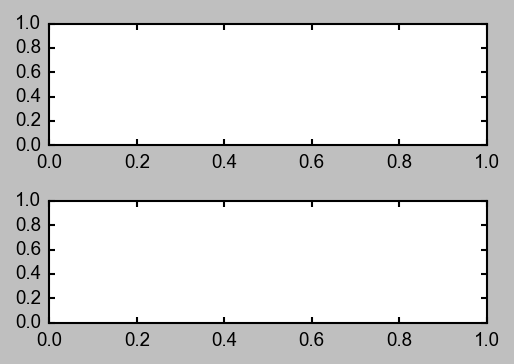

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1)
im1 = ax1.imshow(np.flip(mags_high.T,1), extent = (min(fields), max(fields), min(freqs_high), max(freqs_high)), 
                     origin='lower', aspect='auto')
ax1.set_xlabel('Fields (mT)')
ax1.set_ylabel('High power freq (GHz)')
im2 = ax2.imshow(np.flip(mags_low.T,1), extent = (min(fields), max(fields), min(freqs_low), max(freqs_low)), 
                     origin='lower', aspect='auto')
ax2.set_ylabel('Low power freq (GHz)')
ax2.set_xlabel('Fields (mT)')

# Fourier Transform

In [30]:
from numpy.fft import rfft, ifft, fft, irfft
from scipy.constants import k, h, mu_0, e
from scipy.special import ellipk

phi_0 = h/2/e # For superconductor

pi = np.pi

def fourier_expansion(x, data, norm='forward', mode='zeroed', plot=True, res=1e-2, n_period=1):
    if mode=='zeroed':
        mean = np.mean(data)
    else:
        mean = 0
    X = fft(data - mean, norm=norm)
    freq = np.fft.fftfreq(len(x), d=(max(x)-min(x))/n_period/2/pi/len(x))
    
    if plot:
        
        fig, ax = plt.subplots()
        ax.plot(x/pi, data, 'b')
        ax.plot(x/pi, ifft(X, norm=norm)+mean, 'r*')
        ax.set_xlabel(r'$\phi$/$\pi$')
        ax.set_ylabel('FFT Amplitude |X(freq)|')        

        fig, ax = plt.subplots()
        ax.plot(freq, 2*np.abs(X), 'b*')
        minimum = 2*min(np.abs(X))
        maximum = 2*max(np.abs(X))
        ran = maximum - minimum
        ax.set_xlabel('Freq (Hz)')
        ax.set_ylabel('FFT Amplitude |X(freq)|')
        ax.set_xlim(xmin=-0.1, xmax=10)
        ax.set_ylim(ymin=minimum-0.1*ran, ymax=maximum+0.1*ran)
    
    X = np.abs(X)
    X[abs(X)<res] = 0
    
    return freq, X

/Users/lulu/anaconda3/envs/phd/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(array([  0.        ,   0.99365942,   1.98731884,   2.98097826,
          3.97463768,   4.9682971 ,   5.96195652,   6.95561594,
          7.94927536,   8.94293478,   9.9365942 ,  10.93025362,
         11.92391304,  12.91757246,  13.91123188,  14.9048913 ,
         15.89855072,  16.89221014,  17.88586957,  18.87952899,
         19.87318841,  20.86684783,  21.86050725,  22.85416667,
         23.84782609,  24.84148551,  25.83514493,  26.82880435,
         27.82246377,  28.81612319,  29.80978261,  30.80344203,
         31.79710145,  32.79076087,  33.78442029,  34.77807971,
         35.77173913,  36.76539855,  37.75905797,  38.75271739,
         39.74637681,  40.74003623,  41.73369565,  42.72735507,
         43.72101449,  44.71467391,  45.70833333,  46.70199275,
         47.69565217,  48.68931159,  49.68297101,  50.67663043,
         51.67028986,  52.66394928,  53.6576087 ,  54.65126812,
         55.64492754,  56.63858696,  57.63224638,  58.6259058 ,
         59.61956522,  60.61322464,  61.

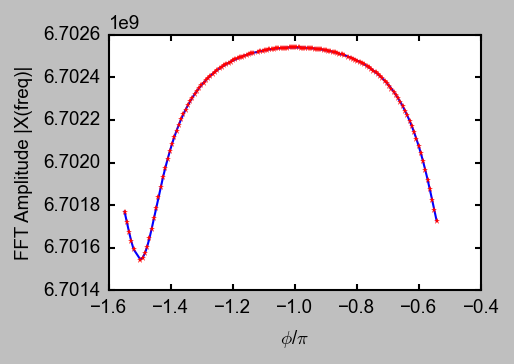

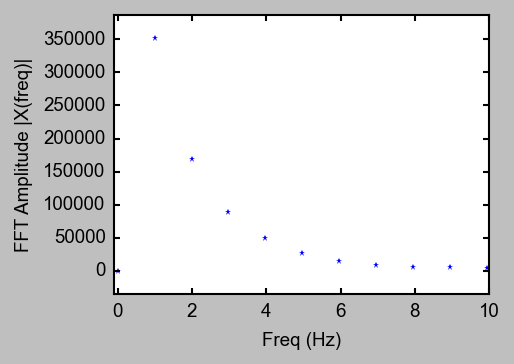

In [33]:
phase = pi*singlecycle_flux
fourier_expansion(phase, singlecycle_f, mode='zeroed', norm='forward', plot=True, n_period=0.5)

/Users/lulu/anaconda3/envs/phd/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(array([   0.    ,    0.5485,    1.097 ,    1.6455,    2.194 ,    2.7425,
           3.291 ,    3.8395,    4.388 ,    4.9365,    5.485 ,    6.0335,
           6.582 ,    7.1305,    7.679 ,    8.2275,    8.776 ,    9.3245,
           9.873 ,   10.4215,   10.97  ,   11.5185,   12.067 ,   12.6155,
          13.164 ,   13.7125,   14.261 ,   14.8095,   15.358 ,   15.9065,
          16.455 ,   17.0035,   17.552 ,   18.1005,   18.649 ,   19.1975,
          19.746 ,   20.2945,   20.843 ,   21.3915,   21.94  ,   22.4885,
          23.037 ,   23.5855,   24.134 ,   24.6825,   25.231 ,   25.7795,
          26.328 ,   26.8765,   27.425 ,   27.9735,   28.522 ,   29.0705,
          29.619 ,   30.1675,   30.716 ,   31.2645,   31.813 ,   32.3615,
          32.91  ,   33.4585,   34.007 ,   34.5555,   35.104 ,   35.6525,
          36.201 ,   36.7495,   37.298 ,   37.8465,   38.395 ,   38.9435,
          39.492 ,   40.0405,   40.589 ,   41.1375,   41.686 ,   42.2345,
          42.783 ,   43.3315,   43.88 

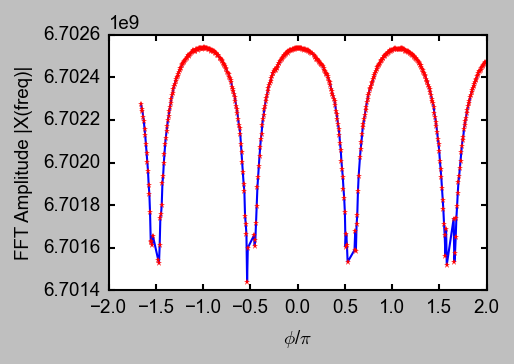

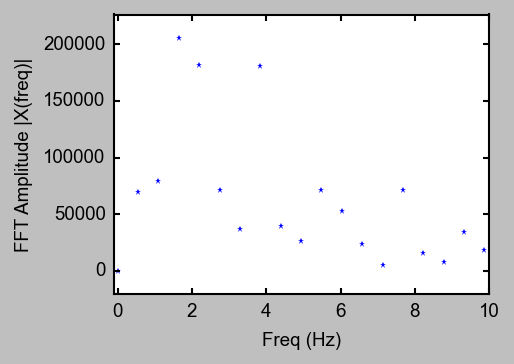

In [14]:
phase = pi*flux_slice
fourier_expansion(phase, fcs_slice, mode='zeroed', norm='forward', plot=True)

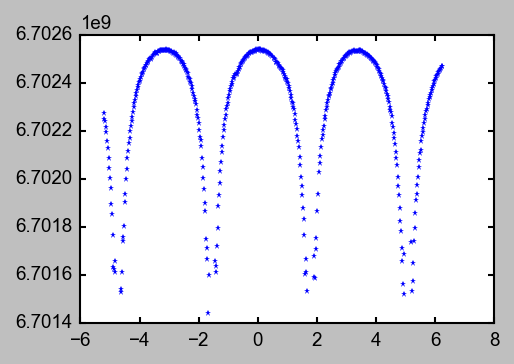

In [22]:
phase = pi*flux_slice
plt.plot(phase, fcs_slice, '*')

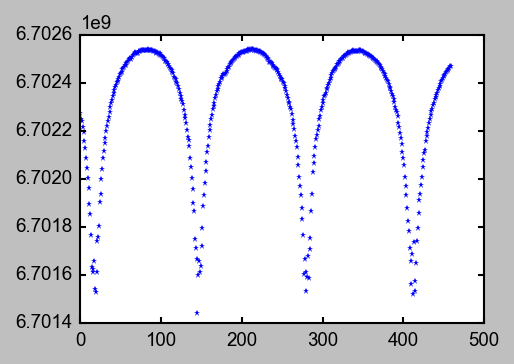

In [19]:
plt.plot(fcs_slice, '*')

Ways to implement non-uniform fourier transform/expansion: \
    - Oversampling + Interpolating non-uniform experimental data \
    - Uniform fourier expansion 

## Test

In [40]:
from numpy import sqrt as sqrt
from numpy import cos as cos
from numpy import sin as sin

In [46]:
def f_c_I(currents, fc, Ej_max,d, I_max=0, P=1):
    fqs = f_q_I(currents, Ej_max,d, I_max, P)
    #print((fc+fqs)/2)
    #print(fqs)
    return (fc+fqs)/2-sqrt(g(currents,fc,Ej_max,d, I_max, P)**2+(fqs-fc)**2/4)

def f_q_I(currents, Ej_max, d, I_max=1, P=1):
    return sqrt(Ej_max*8*Ec)*np.power(cos(np.pi*(currents-I_max)/P)**2+d**2*sin(np.pi*(currents-I_max)/P)**2, 1/4)

def g(currents, fc, Ej_max, d, I_max=1, P=1):
    return g0*fc*np.power(Ej_max, 1/4)*np.power(cos(np.pi*(currents-I_max)/P)**2+d**2*sin(np.pi*(currents-I_max)/P)**2, 1/8)

/Users/lulu/anaconda3/envs/phd/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
           9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
          18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
          27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
          36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
          45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
          54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
          63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
          72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
          81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
          90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
          99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
         108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
         117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
      

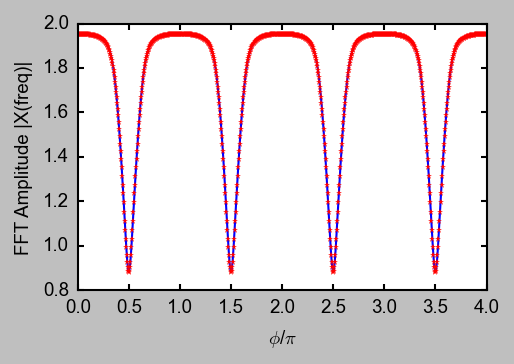

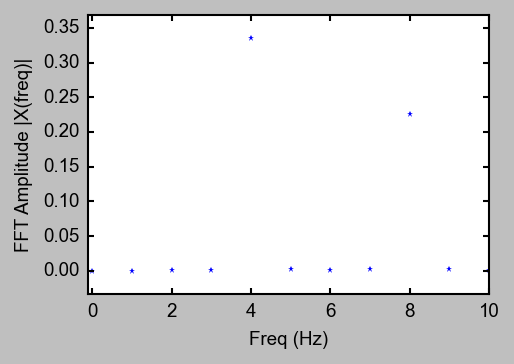

In [49]:
Ej_max = 1
Ec = 1
fc = 2
g0 = 0.1
c = np.linspace(0, 4*pi, 801)
d = 0.1
fourier_expansion(c, f_c_I(c, fc, Ej_max, d, P=api), mode='zeroed', norm='forward', plot=True, n_period=2)

In [51]:
np.fft.fftfreq(4, 4/801)

array([   0.    ,   50.0625, -100.125 ,  -50.0625])

In [3]:
120**2/(1.325)

10867.924528301886